11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 10s 36ms/step - loss: 0.2444 - val_loss: 0.1646
Epoch 2/50
235/235 [==============================] - 10s 43ms/step - loss: 0.1478 - val_loss: 0.1331
Epoch 3/50
235/235 [==============================] - 8s 33ms/step - loss: 0.1280 - val_loss: 0.1206
Epoch 4/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1185 - val_loss: 0.1144
Epoch 5/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1129 - val_loss: 0.1089
Epoch 6/50
235/235 [==============================] - 6s 24ms/step - loss: 0.1090 - val_loss: 0.1058
Epoch 7/50
235/235 [==============================] - 4s 19ms/step - loss: 0.1061 - val_loss: 0.1035
Epoch 8/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1039 - val_loss: 0.1017
Epoch 9/50
235/235 [==============================] - 5s 21ms/step - loss: 0.1021 - val_loss: 0.1001
Epoch 10/50
235/235 [===

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy of k-means clustering: 0.0888
1/1 [==============================] - 0s 86ms/step


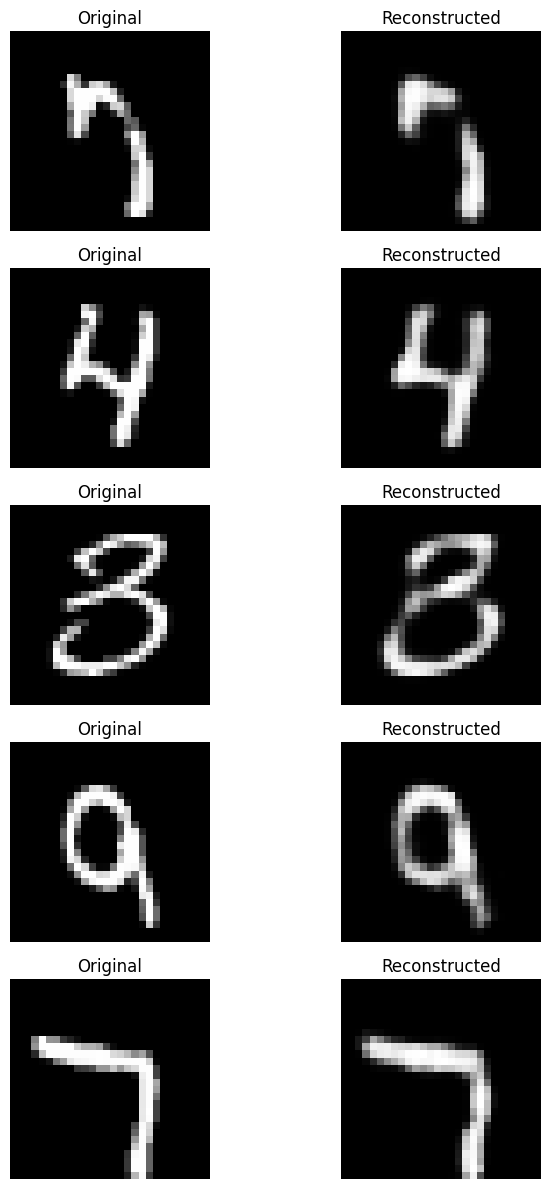

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape the input data
x_train = np.reshape(x_train, (len(x_train), -1))
x_test = np.reshape(x_test, (len(x_test), -1))

# Define the sparse autoencoder model
input_dim = x_train.shape[1]
encoding_dims = [128, 64, 32]

input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dims[0], activation='relu')(input_img)
encoded = Dense(encoding_dims[1], activation='relu')(encoded)
encoded = Dense(encoding_dims[2], activation='relu')(encoded)

decoded = Dense(encoding_dims[1], activation='relu')(encoded)
decoded = Dense(encoding_dims[0], activation='relu')(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder model
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Obtain the embeddings from the encoder part of the autoencoder
encoder = Model(input_img, encoded)
embeddings = encoder.predict(x_train)

# Perform k-means clustering on the embeddings
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(embeddings)

# Predict cluster labels
cluster_labels = kmeans.predict(embeddings)

# Evaluate the performance of k-means clustering using available labels
accuracy = accuracy_score(y_train, cluster_labels)
print("Accuracy of k-means clustering:", accuracy)

# Select random images for comparison
num_samples = 5
random_indices = np.random.choice(range(len(x_train)), num_samples)

# Generate reconstructed images
reconstructed_imgs = autoencoder.predict(x_train[random_indices])

# Reshape the images for plotting
x_train_reshaped = x_train[random_indices].reshape(num_samples, 28, 28)
reconstructed_imgs_reshaped = reconstructed_imgs.reshape(num_samples, 28, 28)

# Plot the original and reconstructed images
fig, axes = plt.subplots(num_samples, 2, figsize=(8, 12))

for i in range(num_samples):
    axes[i, 0].imshow(x_train_reshaped[i], cmap='gray')
    axes[i, 0].axis('off')
    axes[i, 0].set_title('Original')

    axes[i, 1].imshow(reconstructed_imgs_reshaped[i], cmap='gray')
    axes[i, 1].axis('off')
    axes[i, 1].set_title('Reconstructed')

plt.tight_layout()
plt.show()